In [1]:
"""

GoogLeNet
https://arxiv.org/pdf/1409.4842.pdf

train 세트에서 test세트를 분리해봐라

"""

'\n\nGoogLeNet\nhttps://arxiv.org/pdf/1409.4842.pdf\n\ntrain 세트에서 test세트를 분리해봐라\n\n'

### Imports

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Concatenate

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

### Load Dataset

In [3]:
## in train_set directory
train_images = glob.glob("./plant-project/train_images/*.jpg")

print(len(train_images) )

1821


In [4]:
train_images[:5]

['./plant-project/train_images\\Train_0.jpg',
 './plant-project/train_images\\Train_1.jpg',
 './plant-project/train_images\\Train_10.jpg',
 './plant-project/train_images\\Train_100.jpg',
 './plant-project/train_images\\Train_1000.jpg']

In [5]:
## in test_set directory
test_images = glob.glob("./plant-project/test_images/*.jpg")

print(len(test_images) )

1821


In [6]:
test_images[:5]

['./plant-project/test_images\\Test_0.jpg',
 './plant-project/test_images\\Test_1.jpg',
 './plant-project/test_images\\Test_10.jpg',
 './plant-project/test_images\\Test_100.jpg',
 './plant-project/test_images\\Test_1000.jpg']

In [7]:
"""
리스트 목록보니까
label 위치에 [ healthy, multiple, rust, scab]- 리스트 형식으로 그대로 넣음
classmode에 raw로 넣자
"""

'\n리스트 목록보니까\nlabel 위치에 [ healthy, multiple, rust, scab]- 리스트 형식으로 그대로 넣음\nclassmode에 raw로 넣자\n'

### Visualize Data

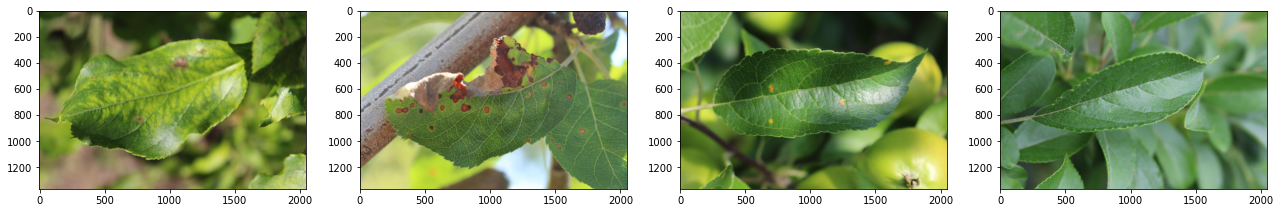

In [8]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=4)
train_images_plot = train_images[:4]
for i in range(4):
    image = cv2.cvtColor(cv2.imread(train_images_plot[i]), cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)

### Preprocess data (from dataframe)

In [9]:
"""
엑셀파일 로드 train와 test 데이터프레임 생성
train 데이터 프레임에 label링 합치기
"""

'\n엑셀파일 로드 train와 test 데이터프레임 생성\ntrain 데이터 프레임에 label링 합치기\n'

In [10]:
pd.set_option("display.max_colwidth", 200)

In [11]:
train_csv_label_df = pd.read_csv('./plant-project/train.csv')
train_csv_label_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [12]:
"""
train_image를 데이터프레임으로 변환 
컬럼에 image_id 로 맞추기
"""

'\ntrain_image를 데이터프레임으로 변환 \n컬럼에 image_id 로 맞추기\n'

In [13]:
train_num_images = []

In [14]:
for i in range (0,len(train_images)):
    
    train_num_li = re.split(r"[\\.]",train_images[i])
    train_num_images.append(train_num_li[2])

In [15]:
train_num_images

['Train_0',
 'Train_1',
 'Train_10',
 'Train_100',
 'Train_1000',
 'Train_1001',
 'Train_1002',
 'Train_1003',
 'Train_1004',
 'Train_1005',
 'Train_1006',
 'Train_1007',
 'Train_1008',
 'Train_1009',
 'Train_101',
 'Train_1010',
 'Train_1011',
 'Train_1012',
 'Train_1013',
 'Train_1014',
 'Train_1015',
 'Train_1016',
 'Train_1017',
 'Train_1018',
 'Train_1019',
 'Train_102',
 'Train_1020',
 'Train_1021',
 'Train_1022',
 'Train_1023',
 'Train_1024',
 'Train_1025',
 'Train_1026',
 'Train_1027',
 'Train_1028',
 'Train_1029',
 'Train_103',
 'Train_1030',
 'Train_1031',
 'Train_1032',
 'Train_1033',
 'Train_1034',
 'Train_1035',
 'Train_1036',
 'Train_1037',
 'Train_1038',
 'Train_1039',
 'Train_104',
 'Train_1040',
 'Train_1041',
 'Train_1042',
 'Train_1043',
 'Train_1044',
 'Train_1045',
 'Train_1046',
 'Train_1047',
 'Train_1048',
 'Train_1049',
 'Train_105',
 'Train_1050',
 'Train_1051',
 'Train_1052',
 'Train_1053',
 'Train_1054',
 'Train_1055',
 'Train_1056',
 'Train_1057',
 'Train_1

In [16]:
train_images

['./plant-project/train_images\\Train_0.jpg',
 './plant-project/train_images\\Train_1.jpg',
 './plant-project/train_images\\Train_10.jpg',
 './plant-project/train_images\\Train_100.jpg',
 './plant-project/train_images\\Train_1000.jpg',
 './plant-project/train_images\\Train_1001.jpg',
 './plant-project/train_images\\Train_1002.jpg',
 './plant-project/train_images\\Train_1003.jpg',
 './plant-project/train_images\\Train_1004.jpg',
 './plant-project/train_images\\Train_1005.jpg',
 './plant-project/train_images\\Train_1006.jpg',
 './plant-project/train_images\\Train_1007.jpg',
 './plant-project/train_images\\Train_1008.jpg',
 './plant-project/train_images\\Train_1009.jpg',
 './plant-project/train_images\\Train_101.jpg',
 './plant-project/train_images\\Train_1010.jpg',
 './plant-project/train_images\\Train_1011.jpg',
 './plant-project/train_images\\Train_1012.jpg',
 './plant-project/train_images\\Train_1013.jpg',
 './plant-project/train_images\\Train_1014.jpg',
 './plant-project/train_images

In [17]:
#col_name = ['image_path','image_id']
train_df_test = pd.DataFrame({'image_path':train_images, 'image_id':train_num_images})

In [18]:
train_df_test.head(20)

,image_path,image_id
0,./plant-project/train_images\Train_0.jpg,Train_0
1,./plant-project/train_images\Train_1.jpg,Train_1
2,./plant-project/train_images\Train_10.jpg,Train_10
3,./plant-project/train_images\Train_100.jpg,Train_100
4,./plant-project/train_images\Train_1000.jpg,Train_1000
5,./plant-project/train_images\Train_1001.jpg,Train_1001
6,./plant-project/train_images\Train_1002.jpg,Train_1002
7,./plant-project/train_images\Train_1003.jpg,Train_1003
8,./plant-project/train_images\Train_1004.jpg,Train_1004
9,./plant-project/train_images\Train_1005.jpg,Train_1005


In [19]:
train_csv_label_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [20]:
"""
이제 train_df_test와 train_csv_label_df 합쳐서 train_df를 만들어야함
"""

'\n이제 train_df_test와 train_csv_label_df 합쳐서 train_df를 만들어야함\n'

In [21]:
train_df = pd.merge(train_df_test, train_csv_label_df, on='image_id')

In [22]:
#완성
train_df.head(15)

,image_path,image_id,healthy,multiple_diseases,rust,scab
0,./plant-project/train_images\Train_0.jpg,Train_0,0,0,0,1
1,./plant-project/train_images\Train_1.jpg,Train_1,0,1,0,0
2,./plant-project/train_images\Train_10.jpg,Train_10,0,0,1,0
3,./plant-project/train_images\Train_100.jpg,Train_100,1,0,0,0
4,./plant-project/train_images\Train_1000.jpg,Train_1000,0,0,1,0
5,./plant-project/train_images\Train_1001.jpg,Train_1001,1,0,0,0
6,./plant-project/train_images\Train_1002.jpg,Train_1002,1,0,0,0
7,./plant-project/train_images\Train_1003.jpg,Train_1003,0,0,0,1
8,./plant-project/train_images\Train_1004.jpg,Train_1004,1,0,0,0
9,./plant-project/train_images\Train_1005.jpg,Train_1005,1,0,0,0


In [23]:
test_csv_label_df = pd.read_csv('./plant-project/test.csv')
test_csv_label_df

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [24]:
test_num_images = []

In [25]:
for i in range (0,len(test_images)):
    
    test_num_li = re.split(r"[\\.]",test_images[i])
    test_num_images.append(test_num_li[2])

In [26]:
test_num_images

['Test_0',
 'Test_1',
 'Test_10',
 'Test_100',
 'Test_1000',
 'Test_1001',
 'Test_1002',
 'Test_1003',
 'Test_1004',
 'Test_1005',
 'Test_1006',
 'Test_1007',
 'Test_1008',
 'Test_1009',
 'Test_101',
 'Test_1010',
 'Test_1011',
 'Test_1012',
 'Test_1013',
 'Test_1014',
 'Test_1015',
 'Test_1016',
 'Test_1017',
 'Test_1018',
 'Test_1019',
 'Test_102',
 'Test_1020',
 'Test_1021',
 'Test_1022',
 'Test_1023',
 'Test_1024',
 'Test_1025',
 'Test_1026',
 'Test_1027',
 'Test_1028',
 'Test_1029',
 'Test_103',
 'Test_1030',
 'Test_1031',
 'Test_1032',
 'Test_1033',
 'Test_1034',
 'Test_1035',
 'Test_1036',
 'Test_1037',
 'Test_1038',
 'Test_1039',
 'Test_104',
 'Test_1040',
 'Test_1041',
 'Test_1042',
 'Test_1043',
 'Test_1044',
 'Test_1045',
 'Test_1046',
 'Test_1047',
 'Test_1048',
 'Test_1049',
 'Test_105',
 'Test_1050',
 'Test_1051',
 'Test_1052',
 'Test_1053',
 'Test_1054',
 'Test_1055',
 'Test_1056',
 'Test_1057',
 'Test_1058',
 'Test_1059',
 'Test_106',
 'Test_1060',
 'Test_1061',
 'Test_

In [27]:
#col_name = ['image_path','image_id']
test_df_test = pd.DataFrame({'image_path':test_images, 'image_id':test_num_images})

In [28]:
test_df_test.head(20)

,image_path,image_id
0,./plant-project/test_images\Test_0.jpg,Test_0
1,./plant-project/test_images\Test_1.jpg,Test_1
2,./plant-project/test_images\Test_10.jpg,Test_10
3,./plant-project/test_images\Test_100.jpg,Test_100
4,./plant-project/test_images\Test_1000.jpg,Test_1000
5,./plant-project/test_images\Test_1001.jpg,Test_1001
6,./plant-project/test_images\Test_1002.jpg,Test_1002
7,./plant-project/test_images\Test_1003.jpg,Test_1003
8,./plant-project/test_images\Test_1004.jpg,Test_1004
9,./plant-project/test_images\Test_1005.jpg,Test_1005


In [29]:
test_csv_label_df

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [30]:
test_df = pd.merge(test_df_test, test_csv_label_df, on='image_id')

In [31]:
#완성
test_df.head(15)

,image_path,image_id
0,./plant-project/test_images\Test_0.jpg,Test_0
1,./plant-project/test_images\Test_1.jpg,Test_1
2,./plant-project/test_images\Test_10.jpg,Test_10
3,./plant-project/test_images\Test_100.jpg,Test_100
4,./plant-project/test_images\Test_1000.jpg,Test_1000
5,./plant-project/test_images\Test_1001.jpg,Test_1001
6,./plant-project/test_images\Test_1002.jpg,Test_1002
7,./plant-project/test_images\Test_1003.jpg,Test_1003
8,./plant-project/test_images\Test_1004.jpg,Test_1004
9,./plant-project/test_images\Test_1005.jpg,Test_1005


In [32]:
#임시 test_df에 healthy 컬럼(라벨로사용)추가
test_df['healthy'] = '0'
test_df['multiple_diseases'] = '0'
test_df['rust'] = '0'
test_df['scab'] = '0'
test_df

,image_path,image_id,healthy,multiple_diseases,rust,scab
0,./plant-project/test_images\Test_0.jpg,Test_0,0,0,0,0
1,./plant-project/test_images\Test_1.jpg,Test_1,0,0,0,0
2,./plant-project/test_images\Test_10.jpg,Test_10,0,0,0,0
3,./plant-project/test_images\Test_100.jpg,Test_100,0,0,0,0
4,./plant-project/test_images\Test_1000.jpg,Test_1000,0,0,0,0
...,...,...,...,...,...,...
1816,./plant-project/test_images\Test_995.jpg,Test_995,0,0,0,0
1817,./plant-project/test_images\Test_996.jpg,Test_996,0,0,0,0
1818,./plant-project/test_images\Test_997.jpg,Test_997,0,0,0,0
1819,./plant-project/test_images\Test_998.jpg,Test_998,0,0,0,0


In [33]:
"""
잘보면 리스트 형식으로 넣은 train_images의 순서와
df으로 받은 label들의 순서가 다르다 
즉 맞춰야한다 - 즉 image_id를 이용해서 맞춰야한다 - 데이터프레임 merge 이용
"""

'\n잘보면 리스트 형식으로 넣은 train_images의 순서와\ndf으로 받은 label들의 순서가 다르다 \n즉 맞춰야한다 - 즉 image_id를 이용해서 맞춰야한다 - 데이터프레임 merge 이용\n'

In [34]:
# 여기서는 image_id를 뺀 train_df가 필요함
train_df

,image_path,image_id,healthy,multiple_diseases,rust,scab
0,./plant-project/train_images\Train_0.jpg,Train_0,0,0,0,1
1,./plant-project/train_images\Train_1.jpg,Train_1,0,1,0,0
2,./plant-project/train_images\Train_10.jpg,Train_10,0,0,1,0
3,./plant-project/train_images\Train_100.jpg,Train_100,1,0,0,0
4,./plant-project/train_images\Train_1000.jpg,Train_1000,0,0,1,0
...,...,...,...,...,...,...
1816,./plant-project/train_images\Train_995.jpg,Train_995,0,0,1,0
1817,./plant-project/train_images\Train_996.jpg,Train_996,0,0,1,0
1818,./plant-project/train_images\Train_997.jpg,Train_997,0,0,0,1
1819,./plant-project/train_images\Train_998.jpg,Train_998,0,0,0,1


In [35]:
train_df_drop = train_df
train_df = train_df_drop.drop(['image_id'], axis=1)


In [36]:
train_df

,image_path,healthy,multiple_diseases,rust,scab
0,./plant-project/train_images\Train_0.jpg,0,0,0,1
1,./plant-project/train_images\Train_1.jpg,0,1,0,0
2,./plant-project/train_images\Train_10.jpg,0,0,1,0
3,./plant-project/train_images\Train_100.jpg,1,0,0,0
4,./plant-project/train_images\Train_1000.jpg,0,0,1,0
...,...,...,...,...,...
1816,./plant-project/train_images\Train_995.jpg,0,0,1,0
1817,./plant-project/train_images\Train_996.jpg,0,0,1,0
1818,./plant-project/train_images\Train_997.jpg,0,0,0,1
1819,./plant-project/train_images\Train_998.jpg,0,0,0,1


In [40]:
"""train_df, valid_df = train_test_split(train_df, test_size=0.2, stratify=train_df["label"])

생각해보니 
train_df에서 test_df도 꺼내고 , valid_df 도 꺼내야하네

"""
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=1)


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [ ]:
train_df.shape

In [ ]:
train_generator = ImageDataGenerator(horizontal_flip = True, rescale=1/255.0 )
train_generator_iterator = train_generator.flow_from_dataframe(dataframe=train_df,
                                                               x_col = "image_path",
                                                               y_col = ['healthy', 'multiple_diseases', 'rust', 'scab'],
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, 
                                                               class_mode="raw")

In [ ]:
valid_generator = ImageDataGenerator(rescale=1/255.0 )
valid_generator_iterator = valid_generator.flow_from_dataframe(dataframe=valid_df,
                                                               x_col = "image_path",
                                                               y_col = ['healthy', 'multiple_diseases', 'rust', 'scab'],
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, 
                                                               class_mode="raw")

In [ ]:
test_generator = ImageDataGenerator(rescale=1/255.0 )
test_generator_iterator = test_generator.flow_from_dataframe(dataframe=test_df,
                                                               x_col = "image_path",
                                                               y_col = ['healthy', 'multiple_diseases', 'rust', 'scab'],
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, 
                                                               class_mode="raw")

* fetch some data

In [ ]:
image_array, label_array = next(train_generator_iterator)
print(image_array.shape, label_array.shape)

### Create Model

In [ ]:
# 이미지는 https://arxiv.org/pdf/1409.4842.pdf 이걸보면됨
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool, name):

    #첫번째 1x1 convolutions
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    #3X3 적용전 1X1 Conv
    conv_3x3 = Conv2D(filters_3x3_reduce, (1,1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3,3), padding='same', activation='relu')(conv_3x3)
    
    # 5X5 적용전 1X1 Conv
    conv_5x5 = Conv2D(filters_5x5_reduce, (1,1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5,5), padding='same', activation='relu')(conv_5x5)
    
    # max pooling 
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool = Conv2D(filters_pool, (1,1), padding='same', activation='relu')(pool)
    
    #Concatenate
    #axis 0 : batch_size, axis 1 : height, axis2 : width, axis3 : depth
    output = Concatenate(axis=-1, name=name)([conv_1x1, conv_3x3, conv_5x5, pool])
    
    return output



In [ ]:
def build_googlenet():
    tf.keras.backend.clear_session()
    
    input_tensor = Input(shape=(224, 224, 3))
    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_tensor)
    x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2))(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), padding='same', strides=(1,1), activation='relu')(x)
    x = Conv2D(filters=192, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu')(x)
    x = MaxPooling2D(pool_size=(3,3), padding='same', strides=(2,2))(x)

    #인셉션 모듈 3a
    x = inception_module(x, 64, 96, 128, 16, 32, 32, name='inception_3a')
    #인셉션 모듈 3b
    x = inception_module(x, 128, 128, 192, 32, 96, 64, name='inception_3b')

    x = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(2, 2))(x)

    #인셉션 모듈 4a
    x = inception_module(x, 192, 96, 208, 16, 48, 64, name='inception_4a')
    #인셉션 모듈 4b
    x = inception_module(x, 160, 112, 224, 24, 64, 64, name='inception_4b')
    #인셉션 모듈 4c
    x = inception_module(x, 128, 128, 256, 24, 64, 64, name='inception_4c')
    #인셉션 모듈 4d
    x = inception_module(x, 112, 144, 288, 32, 64, 64, name='inception_4d')
    #인셉션 모듈 4e
    x = inception_module(x, 256, 160, 320, 32, 128, 128, name='inception_4e')

    x = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(2, 2))(x)

    #인셉션 모듈 5s
    x = inception_module(x, 256, 160, 320, 32, 128, 128, name='inception_5a')
    #인셉션 모듈 5b
    x = inception_module(x, 384, 192, 384, 48, 128, 128, name='inception_5b')

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    output = Dense(1, activation="sigmoid")(x)


    model = Model(inputs=input_tensor, outputs=output)

    model.summary()
    return model

model = build_googlenet()

### Compile Model, Train

In [ ]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=12, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)

In [ ]:
"""
loss 함수를 일단 categorical_crossentropy 이거로 주는데
class_mode의 raw와 맞는지 모르겠네
binary_crossentropy - 이거로하니까 점수가 동일하게 반복됨 - 즉 학습이 안됨 
15s 671ms/step - loss: 0.5627 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500

categorical_crossentropy - 이거로 하면 에러 뜸 - 이거로 해야함 - 그리고 softmax 이야기도 나옴

아 잘못 생각했네 - test를 따로 만들어야함 train_df로 따로 만들어주셈 

"""
model.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator_iterator, epochs=40, validation_data=valid_generator_iterator,
                   callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

### Evaluate

In [ ]:
model.evaluate(test_generator_iterator)